### Analyze images with CV2

* get height, width from a jpeg image
* plot the image
* plot a BB rectangle on the image (use YOLO v5 format)

In [1]:
import glob
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# get a list of jpg images
list_imgs = glob.glob("*.jpg")

list_imgs

['my_red_bull1.jpg', 'oralogo1.jpg', 'siemens7.jpg']

### Getting height, width of images

In [3]:
print("Printing height, width of images from the list")
print()

for img_name in list_imgs:
    # read the image in a numpy array
    image = cv2.imread(img_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hgt, wdt, channels = image.shape
    
    print(f"hgt, wdt of {img_name} are: {hgt, wdt}")

Printing height, width of images from the list

hgt, wdt of my_red_bull1.jpg are: (183, 275)
hgt, wdt of oralogo1.jpg are: (134, 377)
hgt, wdt of siemens7.jpg are: (659, 1000)


In [4]:
type(image)

numpy.ndarray

### Plot images

CPU times: user 1.29 s, sys: 182 ms, total: 1.47 s
Wall time: 84.2 ms


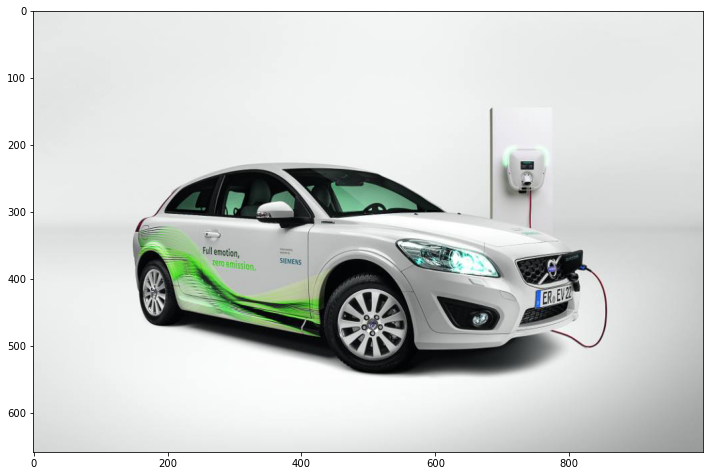

In [5]:
%%time
IMAGE_NAME = "siemens7.jpg"

# read the image from the file
image = cv2.imread(img_name)
# we need it otherwise blue becomes red (checked on Mac). CV2 when read the image use BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 9))
plt.imshow(image);

### Plot a BB rectangle on the image

* the BB is given in the YOLO V5 format

In [6]:
# transform yolov5 in start_point, end_point
# yolo v5 is: <object-class> <xc> <yc> <width> <height>
# where all values are scaled to image width and height (in range 0,1)

def yolo_2_cv2(yolo_bb, image_hgt, image_wdt):
    # yolobb is an array of 4 float number <x> <y> <width> <height>
    assert (len(yolo_bb) == 4)
    
    # image_hgt, image_wdt are in pixels
    
    # compute absolute pixels of center
    xc = int(yolo_bb[0] * image_wdt)
    yc = int(yolo_bb[1] * image_hgt)
    
    half_abs_wdt = int((yolo_bb[2] * image_wdt)/2)
    half_abs_hgt = int((yolo_bb[3] * image_hgt)/2)
    
    start_point = (xc - half_abs_wdt , yc - half_abs_hgt)
    end_point = (xc + half_abs_wdt, yc + half_abs_hgt)
    
    return start_point, end_point

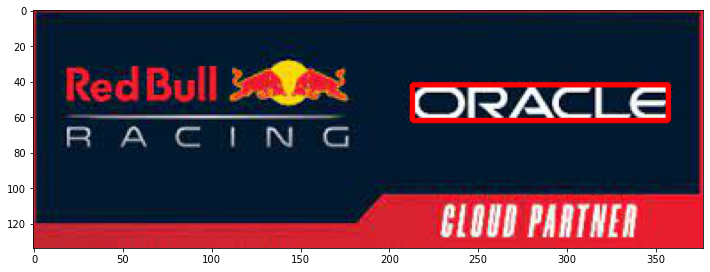

In [9]:
# in YOLO V5 format BB is 0.38358557 0.5676949 0.036231667 0.02308482

# mapping
# x --> w
# y --> h

# IMAGE_NAME = "siemens7.jpg"
IMAGE_NAME = "oralogo1.jpg"

# taken from OCI Data Labelling
# for siemens7
# yoloBB = [0.38358557, 0.5676949, 0.036231667, 0.02308482]

# for oracle in oralogo1 uncomment
yoloBB = [0.75789833, 0.3945279, 0.3828147, 0.15441272]
# oralogo1 red bull
# yoloBB = [0.25664458, 0.32144925, 0.42204246, 0.19349551]

# read the image from the file
image = cv2.imread(IMAGE_NAME)
# we need it otherwise blue becomes red (checked on Mac). CV2 when read the image use BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# transform from yolo v5 to cv2
start_point, end_point = yolo_2_cv2(yoloBB, image.shape[0], image.shape[1])

# for plotting
# Red color in RGB (image is already in RGB)
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with red line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)

plt.figure(figsize=(12, 9))
plt.imshow(image);